Привет) Спасибо за подробные комментарии + только что была консультация, так что старых вопросов больше не осталось, а новые еще не появились. В целом, понятно, что временные ряды - отдельная история)

По поводу того чтобы удалить месяц из признаков - по логике-да, согласна. Сделала это, на качестве модели особо не сказалось, но все же. Также в конце проекта есть графики с предсказаниями и реальными занчениями (спасибо за идею, выглядит действительно репрезентативно)

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Алена, привет! рад вновь приветствовать тебя! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />

## Описание проекта

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

### Инструкция по выполнению проекта

1. Загрузите данные и выполните их ресемплирование по одному часу.
2. Проанализируйте данные.
3. Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
4. Проверьте данные на тестовой выборке и сделайте выводы.

### Описание данных

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце '*num_orders*' (от англ. *number of orders*, «число заказов»).

# 0. Импорт библиотек

In [97]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 1. Подготовка

Загрузим данные и посмотрим общую информацию

In [98]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB
None


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Пропусков нет. Данные нужно отсортировать по времени и ресемплировать по одному часу по сумме.

In [99]:
data.sort_index(inplace=True)
data = data.resample('1H').sum()
print("Известны данные с", data.index.min(), "по", data.index.max())

Известны данные с 2018-03-01 00:00:00 по 2018-08-31 23:00:00


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
есть прогнозное начало)

# 2. Анализ

Чтобы лучше понимать временной ряд, разберём тренды и сезонность. Разложим временной ряд на три составляющие: тренд, сезонность и остаток 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='orange'>
надо сказать, что временные ряды - особняком стоят от других методово моделирования. Тут проверять боксплотом на выбросы - не совсем информативно будет. В данных же есть тренд, сезонность, есть особые продажи - их надо идентифицировать по-другому.

Text(0.5, 1.0, 'Seasonality')

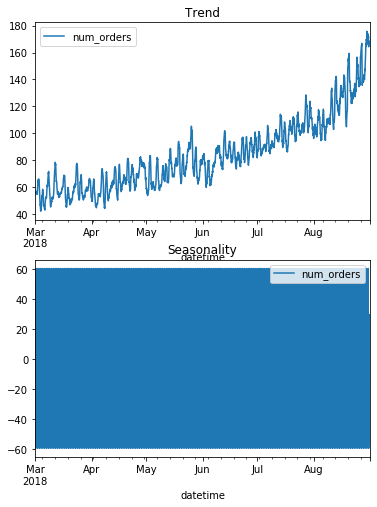

In [100]:
decomposed = seasonal_decompose(data)

plt.figure(figsize=(6, 8))
plt.subplot(211)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(212)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

Виден тренд роста числа заказов такси с марта по конец августа - возможно, данный сервис становится популярней. Возможно, если смотреть данные за несколько лет, то это окажется сезонностью: летом такси заказывают чаще, чем зимой. С сезонностью пока не понятно - попробуем смотреть меньшие временные промежутки

Text(0.5, 1.0, 'During the day')

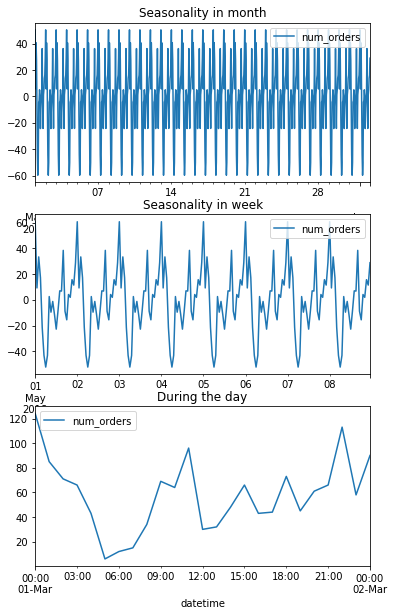

In [101]:
decomposed = seasonal_decompose(data['2018-05-01':'2018-06-01'])
plt.figure(figsize=(6, 10))
plt.subplot(311)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality in month')

decomposed = seasonal_decompose(data['2018-05-01':'2018-05-08'])
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality in week')

plt.subplot(313)
data['2018-03-01 00:00:00':'2018-03-02 00:00:00'].plot(ax=plt.gca())
plt.title('During the day')

Видна сезонность с периодом в один день. Посмотрим, как меняется среднее количество заказов в течение суток, недели и месяца, чтобы проверить, есть ли там закономерности

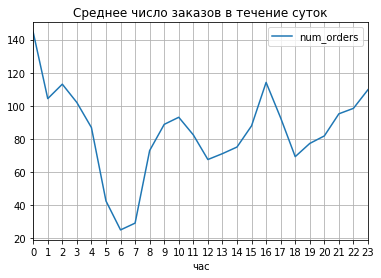

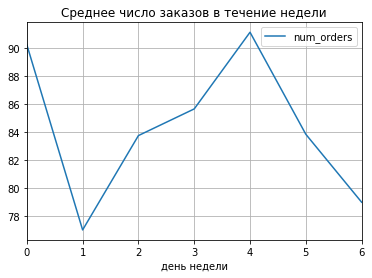

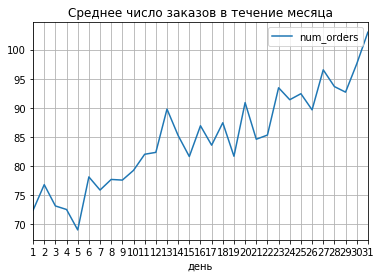

In [102]:
groupped = pd.pivot_table(data, values='num_orders', index=data.index.hour, aggfunc='mean') 
groupped.plot()
plt.title('Среднее число заказов в течение суток')
plt.xlabel('час')
plt.xticks(range(24))
plt.grid()
plt.show()

groupped = pd.pivot_table(data, values='num_orders', index=data.index.dayofweek, aggfunc='mean') 
groupped.plot()
plt.title('Среднее число заказов в течение недели')
plt.xlabel('день недели')
plt.xticks(range(7))
plt.grid()
plt.show()

groupped = pd.pivot_table(data, values='num_orders', index=data.index.day, aggfunc='mean') 
groupped.plot()
plt.title('Среднее число заказов в течение месяца')
plt.xlabel('день')
plt.xticks(range(1, 32))
plt.grid()
plt.show()

По первому графику видно, что самый высокий спрос - около полуночи и в 16 часов, самый низкий - с 5 до 7 утра. По второму - что чаще всего заказывают такси в понедельник(0) и пятницу(4), реже - во вторник(1), от вторника и до пятницы наблюдается увеличение числа закзаов. По третьему - что в среднем такси заказывают реже всего в первых числах месяца, чем дальше - тем чаще (с пиками, связанными с днем недели)

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Исследование - принимется, хорошо, что глянули график на коротком периоде<br>
Инструмент декомпозиции в частности, а графический анализ временных рядов как в принципе - очень нужный этап моделирования рядов.<br> Позволяет увидеть продажи визуально, а это очень помогает сделать предвариетльные выводы<br>
    
Хочу озвучить ещё такой момент<br>
Дело в том, в реальности бизнеса есть все три вида сезонности:<br>
1)дневная сезонность есть - ведь данные собраны по дням, т.е. будни и выходные имеют разные продажи<br>
2)Но ведь есть ещё внутрисуточная сезонность: когда продажи утром отличаются от продаж вечером (об этом Вы сказали) <br>
3)Ну и наконец есть месячная сезонность: когда продажи лета и осени - разные.<br><br>
И если строить прогноз на длительный период времени, то без учёта всех видов сезонности  - не обойтись<br>
Например: есть в данных (и Вы об этом пишите) восходящий тренд. Но вопрос такой возникает: <br>
этот подъём действительно за счёт роста компании (чаще всего тренд - это отражение роста компании) или есть ещё влияние месячной сезнности? (летом - продаж в рост, например, и именно этот момент мы наблюдаем в данных)<br>
Ответ на вопрос - не протой на имеющихся данных - у нас данных меньше года. А это означает, что месячную сезонность нам не просто вычислить адекватно - т.е. не внести в модель корректтировки месяцев(<br>
Поэтому, я бы дал такой совет:<br>
на горизонте прогнозирования - несколько часов или дней - можно предположить что у нас тренд.<br>
А если строить прогноз на несколько недель - вот тут утверждать наличие тренда надо с большой осторожностью))))<br><br>
Ну, а если вернуться к постановке задаче - построить прогноз на час (очень маленький горизонт), то одной сезонности может и хватить.
</font>

Итак, можно выделит признаки, которые будут нужны модели для обучения: из  календарных признаков - час, день недели, день месяца заказа, с отстающими значениями и скользящим средним нужно будет проэексперементировать.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Вывод понятен. Может месяц здесь будет лишним... именно из-за того что данных менее года. Ну, допустим, данных за июль, например только одно (один месяц).

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
По параметрам lag и rolling:<br>
Lag: его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и не много закусили.... повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией также. Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - воалияли на сегоняшние.Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br>
    
rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. 

# 3. Обучение

Горизонт прогнозирования - 1 час. Напишем функцию make_features создания признаков, чтобы можно было легко проварьировать отстающие значения и скользящее среднее и функцию split, которая будет разбивать данные на тестовую (10%) и тренировочную выборки

In [103]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    #data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

def split(data):
    global train_features
    global test_features
    global train_target
    global test_target
    global train
    global test
    
    train, test = train_test_split(data, shuffle=False, test_size=0.1)
    train = train.dropna()

    train_features = train.drop('num_orders', axis = 1)
    test_features = test.drop('num_orders', axis = 1)
    train_target = train['num_orders']
    test_target = test['num_orders']
    

Теперь попробуем обучить модели Дерева, Леса и Линейной регресси с различными входными признаками (отставание и скользящее среднее) и гиперпараметрами (для дерева - глубина, для леса - количество деревьев, для регрессии - ничего. Все результаты RMSE соберем в одной таблице и выведим 10 лучших моделей по этому показателю

In [104]:
compare = []
columns = ['model', 'model_params', 'features_params', 'test_rmse']

for max_lag in range(5, 16, 5):
    for rolling_mean_size in range(5, 16, 5):
        
        #create features
        make_features(data, max_lag, rolling_mean_size)
        #split
        split(data)
        
        #DecisionTreeRegressor
        for max_depth in range(10, 31, 10):
            model = DecisionTreeRegressor(max_depth = max_depth, random_state = 123)
            model.fit(train_features, train_target)
            test_pred = model.predict(test_features)
            rmse = mean_squared_error(test_pred, test_target)**0.5
            compare.append(['Tree', 'max_depth = {}'.format(max_depth),
                            'max_lag = {}, r_m_size = {}'.format(max_lag,rolling_mean_size), rmse])
        #Forest
        for n_estimators in range(5, 26, 10):
            model = RandomForestRegressor(n_estimators = n_estimators, random_state = 123)
            model.fit(train_features, train_target)
            test_pred = model.predict(test_features)
            rmse = mean_squared_error(test_pred, test_target)**0.5
            compare.append(['Forest', 'n_estimators = {}'.format(n_estimators),
                            'max_lag = {}, r_m_size = {}'.format(max_lag,rolling_mean_size), rmse])
            
        #LinearRegression
        model = LinearRegression(n_jobs = -1)
        model.fit(train_features, train_target)
        test_pred = model.predict(test_features)
        rmse = mean_squared_error(test_pred, test_target)**0.5
        compare.append(['LinearRegression', '-',
                            'max_lag = {}, r_m_size = {}'.format(max_lag,rolling_mean_size), rmse])
        
    
results = pd.DataFrame(data = compare, columns = columns)
results.sort_values('test_rmse', ascending = True).head(10)
    

,model,model_params,features_params,test_rmse
61,Forest,n_estimators = 25,"max_lag = 15, r_m_size = 15",44.005886
32,Forest,n_estimators = 15,"max_lag = 10, r_m_size = 10",44.465013
40,Forest,n_estimators = 25,"max_lag = 10, r_m_size = 15",44.629524
33,Forest,n_estimators = 25,"max_lag = 10, r_m_size = 10",45.204106
39,Forest,n_estimators = 15,"max_lag = 10, r_m_size = 15",45.770641
60,Forest,n_estimators = 15,"max_lag = 15, r_m_size = 15",45.902507
31,Forest,n_estimators = 5,"max_lag = 10, r_m_size = 10",45.961464
54,Forest,n_estimators = 25,"max_lag = 15, r_m_size = 10",45.988965
53,Forest,n_estimators = 15,"max_lag = 15, r_m_size = 10",46.464947
19,Forest,n_estimators = 25,"max_lag = 5, r_m_size = 15",47.048647


Явно лидирует Лес, лучший показатель у модели с n_estimators = 25, обученной на признаках со следующими параметрами: max_lag = 15, rolling_mean_size = 10. RMSE у нее примерно 44, что уже достаточно. Попробуем проварьировать параметры для Леса, чтобы выжать еще больше

In [ ]:
forest = []
columns = ['model_params', 'features_params', 'test_rmse']

for max_lag in range(1, 30, 5):
    for rolling_mean_size in range(1, 30, 5):
        
        #create features
        make_features(data, max_lag, rolling_mean_size)
        #split
        split(data)
        
        #Forest
        for n_estimators in range(5, 100, 10):
            model = RandomForestRegressor(n_estimators = n_estimators, random_state = 123)
            model.fit(train_features, train_target)
            test_pred = model.predict(test_features)
            rmse = mean_squared_error(test_pred, test_target)**0.5
            forest.append(['n_estimators = {}'.format(n_estimators),
                            'max_lag = {}, r_m_size = {}'.format(max_lag,rolling_mean_size), rmse])
            
forests_results = pd.DataFrame(data = forest, columns = columns)
forests_results.sort_values('test_rmse', ascending = True).head(10)

Наибольшего успеха модель достигла при обученнии на признаках со следующими параметрами: max_lag = 26, rolling_mean_size = 6. При этом чем больше n_estimators, тем лучше RMSE, однако гнаться за десятыми долями процентов - опасно, модель может переобучиться. Остановимся на n_estimators = 55, max_lag = 26, rolling_mean_size = 6

# 4. Тестирование

Обучим победившую модель и проверим ее на тестовой выборке

In [105]:
make_features(data, 26, 6)
split(data)

model = RandomForestRegressor(n_estimators = 55, random_state = 123)
model.fit(train_features, train_target)
test_pred = model.predict(test_features)
rmse = mean_squared_error(test_pred, test_target)**0.5
print('RMSE полученной модели:', rmse)

RMSE полученной модели: 42.643897166196126


Измерим качество предсказания временных рядов и проверим модель на адекватность. Спрогнозируем временной ряд без обучения двумя способами:

1) Все значения тестовой выборки предсказываются одним и тем же числом (медианой).
2) Новое значение x(t) прогнозируется предыдущим значением ряда, то есть x(t-1).


In [106]:
pred_median = np.ones(len(test)) * train['num_orders'].median()
print("RMSE медианной модели:",  mean_squared_error(pred_median,test['num_orders'])**0.5)

pred_previous = test['num_orders'].shift()
pred_previous.iloc[0] = train['num_orders'].iloc[-1]

print("RMSE отстающей модели:",  mean_squared_error(pred_previous,test['num_orders'])**0.5)

RMSE медианной модели: 87.15277582981295
RMSE отстающей модели: 58.856486242815066


Второй вариант модели без обучения справляется лучше медианного, но наша модель сильно превосходит их обе, а значит проверка на адекватность пройдена)

Посмотрим, в каких местах модель обычно ошибается. Напишем для этого специальную функцию

In [107]:
graph = pd.DataFrame(columns = ['pred', 'real'])
graph['pred'] = test_pred
graph['real'] = list(test['num_orders'])
graph.index = test.index

def choose(a, b):
    chose = graph[a:b]
    plt.plot(chose.index.hour, chose['pred'], label = 'pred')
    plt.plot(chose.index.hour, chose['real'], label = 'real')
    plt.legend()
    plt.xlabel('Время')
    plt.ylabel('Количество заказов')
    plt.show()

Посмотрим на предсказанное количество заказов и их реальное количество в первую неделю предсказаний - с 13 по 19 августа

13 августа 1 день недели


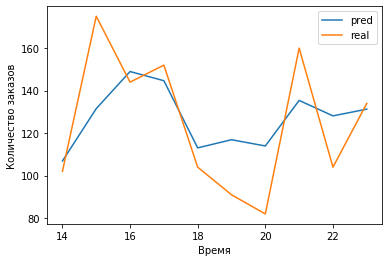

14 августа 2 день недели


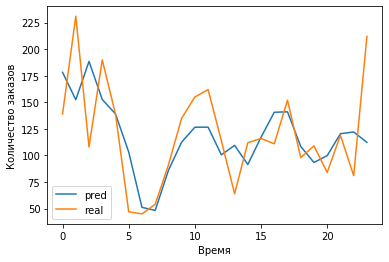

15 августа 3 день недели


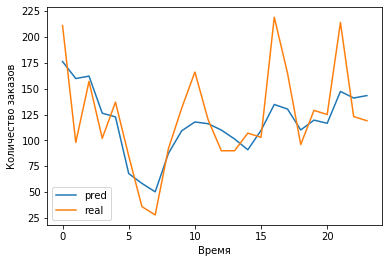

16 августа 4 день недели


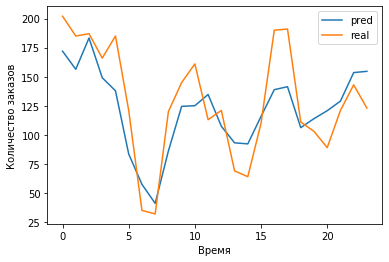

17 августа 5 день недели


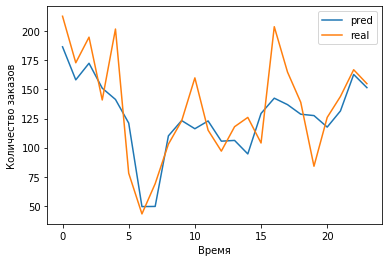

18 августа 6 день недели


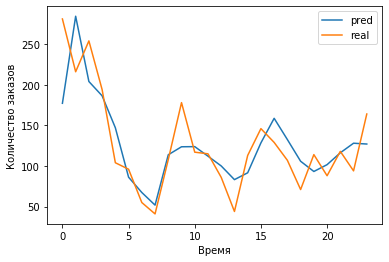

19 августа 7 день недели


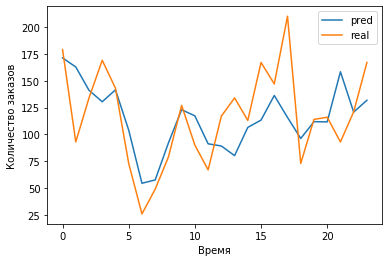

In [108]:
for i in range(13, 20):
    print(i, 'августа', i-12, 'день недели')
    choose('2018-08-%d 00:00:00'%i, '2018-08-%d 23:00:00'%i)

В целом, модель чувствует тенденции и пики, но будто 'боится' предсказывать выбивающиеся (сильно высокие или сильно низкие значения), но для данной задачи это может быть и полезно)

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u>
</font>
<font color='green'>
Алена, привет!<br>
Спасибо, что отреагировала на мои комментарии.<br>
Здорово, когда нет вопросов)<br>
Да, графикик - это совсем другая история..<br>
А модель "боится", потому что в тестовых данных появился фактор продаж, которого не было, когда модель обучалась. Пожтому и "боится", что не знает.)<br> тут надо ещё глубзе копать)<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Алена, с модельной частью справилась хорошо!<br>
Видно, что этот скил уже достаточно сильный у тебя.<br>
Интересные графики на этапе декомпозиции.<br>
Чаще всего, те кто занимаются бизнес-прогнозированием продаж, используют именно это интсрумент. Плюс теорию по видам сезонностей. Если она не одна, то стараются это учесть. Но тут (как и пишу ниже) важен горизонт прогноза. Если он маленький (как у нас - на час) то часовой и недельной сезонности - хватит. Если горизонт прогноза большой - на 4 недели вперёд, например, то без месячной сезонности не обойтись.
    
Если сутейно рассуждать, то временные ряды стоят особняком во всём курсе, я бы сказал. Тут чуть иная модельная философия, на мой взгляд. Имменно поэтому позволял себе оставлять большие комментарии, чтобы как-то раскрыть её особенности.<br>
    
Уверен, что сумев понять главную особенность временных рядов - составляющие ряда и их влияние на прогноз продаж, у тебя появится уверенный скил и по этой теме.<br>
Готов буду ответить на твои вопросы!<br>
<font color='red'>    
А заодно, может будет у тебя время, построить график прогноз-факт на одном рисунке. Это будет эффектно: визуально посмотерть где именно не попадает наш прогноз.<br>

<br>
<font color='green'>
Спасибо)<BR>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Хотел бы оставить несколько идей для Ваших будущих проектов в этой обоасти<br>

На мой взгляд, в этой теме (временные ряды) главное - необходимо чувствовать исходный ряд продаж, с точки зрения бизнеса, и уже только потом подбирать к нему модели. Каждое колебание временного ряда - это деньги для бизнеса (если говорим что заказчик бизнесовый) и за "трепетами" данных прячутся разные семейства причин. И именно знание их помогут строить хорошие прогнозы..<br>.
Леса, бустинги, регрессии.... могут подобрать хорошие модели на старых данных. Но иногда, как прогноз эти, модели могут оказаться пустышками - не интересными бизнесу. <br>  <br>
Поэтому, от себя позволю добавить несколько идей:<br>
Очень часто ищут "волшебную таблетку" или "кнопку". Нажал и само всё построилось с высокой точностью<br>
Но такого никогода не будет)))<br>
И причиной тому: модели нужно подсказать причины, по которым происходит колебания продаж (временного ряда): понимать причины колебаний треда, понимать аномалии, учитывать акционные продажи, видеть действия конкурентов , закладывать их в модель и т.д. <br><br>
В общем, всё как обычно - три группы факторов: <br>
1)внешние факторы (например выручка такси-компании зависит от количества машин на линии),<br>
2)есть факторы внутри самих данных (Вы использовали как раз поняти лаг, сезонности), <br>
3)есть параметры самих моделей (то, что обычно используется при моделировании леса или деревьев).<br><br>

Ещё важно иметь ввиду горизонт прогноза: на кокой период строить прогноз нужно  - на час вперёд, на неделю, на месяц.<br>
Это также накладывает ограничения на подбор моделей<br>
Я бы рекомендовал Вам составить для себя матрицу  в разрезе: <br>
а)есть тренд/нет тренда; <br>
б)еть сезоннотсь/нет сезонности; <br>
в)какой горизонт прогноза требуется; <br>
г) есть ли у нас дополнительные факторы для модей<br>
На пересечении знаний о моделях легко будет подобрать адкватную модель.
Не все задачи прогнозирования временных рядов можно хорошо решить лесом и еже с ним на основе знаний только факторов ряда... Они хорошо подойдут для коротких горизонтов прогнозирования.... А если горизонт чуть больше: недели, месяцы... то тут надо подключать понимания фаткоров продаж самого бизнеса.

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48